#### Want to know more about Decision Trees? Have a look at this awesome article which summarises everthing you need to start with Decision trees

https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c

> Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They work by recursively splitting the data into subsets based on the values of the features, with the goal of creating a tree-like model that can be used to make predictions on new, unseen data.

In the case of classification, decision trees are used to classify instances based on a set of features. The decision tree consists of internal nodes that represent tests on the features, and branches that represent the possible outcomes of each test. The leaves of the tree represent the class labels.

The basic idea behind the construction of a decision tree is to choose a feature that maximizes the information gain or reduces the impurity at each split. The most common impurity measures used are Gini index and entropy. The information gain measures the reduction in entropy or impurity of the dataset after a split.

## Advantages

- Decision trees are easy to interpret and visualize, making it easier to communicate the logic behind the model to stakeholders and decision-makers
- Decision trees can handle non-linear relationships between features
- Decision trees can automatically select the most relevant features, reducing the need for feature selection
- Ability to handle both categorical and continuous data 
- They also perform well on small to medium-sized datasets with a moderate number of features.

## Disadvantages

- Decision trees can suffer from overfitting if the tree is too deep or too complex. This can lead to poor generalization performance on new, unseen data
- Decision trees can be biased towards features with many values, or towards features that appear earlier in the tree
- They can be computationally expensive to train, especially when dealing with large datasets or complex trees

In [3]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn import metrics, tree

## DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


import pyrsm as rsm

In [4]:
data = pd.read_pickle('https://raw.githubusercontent.com/vnijs/pyrsm/main/pyrsm/data/model/fraud_data.pkl')

In [5]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.222880e+05,222288.000000,222288.000000,222288.000000,222288.000000,2.222880e+05,2.222880e+05,222288.000000,222288.000000,222288.000000
mean,4.207592e+17,69.401502,48805.671278,38.537418,-90.231433,8.803416e+04,1.380672e+09,38.537002,-90.232102,0.003842
std,1.313834e+18,149.463684,26892.840297,5.058758,13.748966,3.006358e+05,5.196285e+06,5.092326,13.758243,0.061864
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027849,-166.669910,0.000000
25%,1.800462e+14,9.620000,26237.000000,34.668900,-96.809400,7.410000e+02,1.376039e+09,34.748957,-96.922423,0.000000
50%,3.521417e+15,47.230000,48154.000000,39.371600,-87.461600,2.408000e+03,1.380740e+09,39.366193,-87.410562,0.000000
75%,4.642255e+15,83.010000,72042.000000,41.846700,-80.158000,1.968500e+04,1.385858e+09,41.938688,-80.231169,0.000000
max,4.992346e+18,13149.150000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.668167,-66.955602,1.000000


In [6]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
191922,2020-08-27 16:50:04,4169759661243568,"fraud_Terry, Johns and Bins",misc_pos,96.71,Jamie,Carr,F,55363 Aaron Circle Suite 450,Lawn,...,40.2236,-76.5380,213,Special educational needs teacher,1972-02-15,f3fc65de5749ead3631c0f9b7a95355a,1377622204,39.866326,-76.664828,0
350244,2020-11-03 08:27:37,4769426683924058915,"fraud_Zieme, Bode and Dooley",gas_transport,85.30,Andrea,Cruz,F,26572 Hodge Villages Suite 512,Mifflin,...,40.5553,-77.4001,1909,Mining engineer,1954-08-22,8a41e2423d25ea0dcd96cbbbfe149186,1383467257,39.930887,-77.448371,0
230792,2020-09-12 14:08:26,6011693194885790,"fraud_Boehm, Predovic and Reinger",misc_pos,3.74,Victoria,Fleming,F,2807 Parker Station Suite 080,Stanchfield,...,45.6675,-93.2433,2607,"Lecturer, further education",1995-12-04,5e00cb43812b425be8c7bcc8b149cd45,1378994906,46.477073,-92.446747,0
405817,2020-11-28 11:14:55,180046765320457,fraud_Johns-Hoeger,entertainment,83.16,Jared,Camacho,M,4257 Perez Mall,Canton,...,40.8027,-81.3739,192805,Building control surveyor,1963-06-30,e40e987ef47ab544db1c4eced0ee832a,1385637295,41.800316,-80.517950,0
280759,2020-10-04 11:36:45,3513618443244549,fraud_Miller-Hauck,grocery_pos,128.99,Amber,Perez,F,954 Reyes Ways,Fulton,...,43.7588,-97.8712,355,Financial adviser,1955-06-26,0dc92a2c21a0a2a1ba20dd56bba70330,1380886605,43.639493,-97.897122,0


In [7]:
data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
rsm.describe(data)

## Fraud Detection Data

#### _Source: Kaggle_

### About the Dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

Following are the columns in the dataset:

- trans_date_trans_time : Date and time of Transaction occuring
- cc_num : Credit card number
- merchant : Organization where the transaction occured
- category : Type of merchant/organization. Eg home, food dining etc
- amt: Amount of transaction
- first : First name of the person who did transaction
- last : Last name of the person who did transaction
- gender
- street
- city
- state
- zip
- lat : Geographical Latitude coordinates of the customer where transaction occured
- long : Geographical Longitude coordinates of the customer where transaction occured
- city_pop : City Population
- job : Current Job of the person who did transaction
- dob : Date of birth
- trans_num : Transaction number
- merch_lat : Geographical Latitude coordinates of the merhcant where transaction occured
- merch_long : Geographical Latitude coordinates of the merhcant where transaction occured
- is_fraud : Variable that tells whether a transaction is fraud or not


In [9]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
dict = {'lat': 'Latitude',
        'long': 'Longitude'}
 
# call rename () method
data.rename(columns=dict,
          inplace=True)

In [11]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'Latitude',
       'Longitude', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
## Encoding Male as 1 and Female as 0

data["GenderMale"] = rsm.ifelse(data.gender == "M",1,0)

In [13]:
data['is_fraud'].value_counts()

0    221434
1       854
Name: is_fraud, dtype: int64

In [14]:
data.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
Latitude                 float64
Longitude                float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
GenderMale                 int64
dtype: object

In [15]:
data_numeric = data.loc[:,data.dtypes!= np.object]

/tmp/ipykernel_124/4184077422.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_numeric = data.loc[:,data.dtypes!= np.object]


In [16]:
data_numeric.head()

,cc_num,amt,zip,Latitude,Longitude,city_pop,unix_time,merch_lat,merch_long,is_fraud,GenderMale
191922,4169759661243568,96.71,17041,40.2236,-76.5380,213,1377622204,39.866326,-76.664828,0,0
350244,4769426683924058915,85.30,17058,40.5553,-77.4001,1909,1383467257,39.930887,-77.448371,0,0
230792,6011693194885790,3.74,55080,45.6675,-93.2433,2607,1378994906,46.477073,-92.446747,0,0
405817,180046765320457,83.16,44702,40.8027,-81.3739,192805,1385637295,41.800316,-80.517950,0,1
280759,3513618443244549,128.99,57340,43.7588,-97.8712,355,1380886605,43.639493,-97.897122,0,0


#### Data Split and assigning Training values as 0 or 1

In [17]:
data_numeric = data_numeric.drop(['cc_num'], axis = 1)

train_data, test_data = train_test_split(data_numeric, test_size=0.3, random_state=42)
train_data["Training"] = 1
test_data["Training"] = 0
data = pd.concat([train_data, test_data], ignore_index=True)

In [18]:
data

,amt,zip,Latitude,Longitude,city_pop,unix_time,merch_lat,merch_long,is_fraud,GenderMale,Training
0,8.70,49440,43.2326,-86.2492,128715,1376249570,43.142312,-87.137187,0,1,1
1,3.86,15920,40.4603,-79.0097,922,1379523248,40.794572,-79.360570,0,0,1
2,55.18,56117,43.5336,-95.6515,399,1373150139,43.027659,-95.111562,0,0,1
3,63.97,29455,32.8357,-79.8217,20478,1371823404,33.204335,-78.992084,0,1,1
4,38.76,22015,38.7894,-77.2818,43102,1384530785,39.367203,-77.338293,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
222283,88.85,89512,39.5483,-119.7957,276896,1388187837,39.431524,-118.885055,0,1,0
222284,58.04,5486,44.6400,-73.3113,1654,1377799974,44.514894,-74.151891,0,1,0
222285,46.81,4555,44.0943,-69.4828,1643,1387424993,43.870709,-68.564362,0,0,0
222286,39.96,59714,45.7801,-111.1439,18182,1377651198,44.857909,-111.244932,0,1,0


### Creating feature list to run models

In [19]:
col_list = [col for col in data.columns if col!= 'Training' and col!= 'is_fraud']

In [20]:
col_list

['amt',
 'zip',
 'Latitude',
 'Longitude',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'GenderMale']

#### Decision Tree w/o Hyperparameter tuning


In [21]:
dt = DecisionTreeClassifier(random_state=42)
# Train
dt.fit(data[data.Training==1][col_list],data[data.Training == 1]['is_fraud'])
# Predict
dt_pred = dt.predict(data[data.Training == 0][col_list])


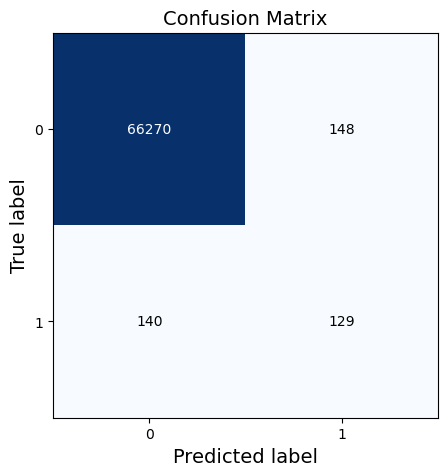

In [22]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(data[data.Training == 0]['is_fraud'],dt_pred), 
                                 figsize=(5, 5), cmap=plt.cm.Blues)

ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [23]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [24]:
data['dt_pred'] = dt.predict_proba(data[col_list])[:,1]

In [25]:
data.head()

,amt,zip,Latitude,Longitude,city_pop,unix_time,merch_lat,merch_long,is_fraud,GenderMale,Training,dt_pred
0,8.70,49440,43.2326,-86.2492,128715,1376249570,43.142312,-87.137187,0,1,1,0.0
1,3.86,15920,40.4603,-79.0097,922,1379523248,40.794572,-79.360570,0,0,1,0.0
2,55.18,56117,43.5336,-95.6515,399,1373150139,43.027659,-95.111562,0,0,1,0.0
3,63.97,29455,32.8357,-79.8217,20478,1371823404,33.204335,-78.992084,0,1,1,0.0
4,38.76,22015,38.7894,-77.2818,43102,1384530785,39.367203,-77.338293,0,1,1,0.0


### What is Hyperparameter Tuning and Cross Validation (CV)?

Hyperparameter tuning refers to the process of selecting the best hyperparameters for a given machine learning algorithm. 

- Hyperparameters are parameters that cannot be learned from the data and must be set manually before training. 
- Examples of hyperparameters include the regularization parameter, maximum depth, number of estimators etc. By tuning these hyperparameters, we can optimize the performance of the model on a given dataset. (We can find all these parameters on sklearn model's help website)

Cross-validation, is a technique for evaluating the performance of a model on a given dataset. 
- In cross-validation, the dataset is divided into k-folds, and the model is trained and tested k times. 
- In each iteration, k-1 folds are used for training, and the remaining fold is used for testing. 
- This process is repeated for each fold, and the results are averaged to obtain a final performance score. Cross-validation can help prevent overfitting and provide a more accurate estimate of the model's performance on unseen data.

Together, hyperparameter tuning and cross-validation can help improve the performance of machine learning models and make them more robust and reliable. By selecting the best hyperparameters and evaluating the model's performance on multiple folds of data, we can create models that generalize well and are less prone to overfitting.


### Why are we using F1 score for scoring and refitting the algorithm?

The F1 score is a commonly used metric for evaluating the performance of classification models. It is a weighted average of precision and recall, which makes it a good choice for problems where both false positives and false negatives are important.

F1 score can be used to refit a classification model when the goal is to improve the model's ability to correctly classify both positive and negative instances, rather than just one of them. This is particularly important when the dataset is imbalanced, meaning that one class is much more frequent than the other. In such cases, accuracy alone may not be a good metric for evaluating the model's performance, as it may give an overly optimistic estimate of the model's true ability to classify the minority class.

#### Decision Tree with CV & Hyperparameter Tuning

In [26]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [27]:
dt_cv = DecisionTreeClassifier(random_state=42)

In [28]:
params = {
    'criterion': ['gini','entropy'],
    'max_depth': list(range(1, 4))
}
grid_dt = GridSearchCV(dt_cv, param_grid=params,scoring = 'f1', cv = kf, n_jobs = 4, refit = 'f1', verbose = 5
                      ).fit(data[data.Training==1][col_list],data[data.Training == 1]['is_fraud'])

best_dt = grid_dt.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [29]:
print("Best Parameters:", grid_dt.best_params_)
print("Best Score", grid_dt.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 1}
Best Score 0.0


In [30]:
dt_cv_pred = grid_dt.predict(data[data.Training==0][col_list])


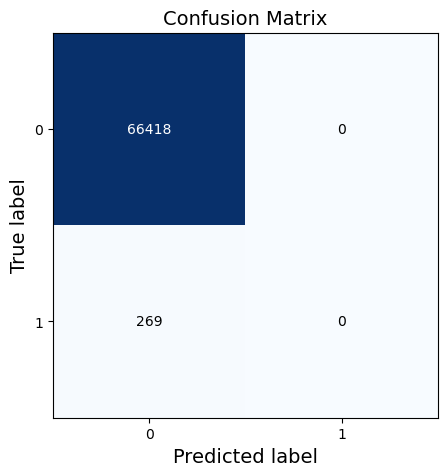

In [31]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(data[data.Training == 0]['is_fraud'],dt_cv_pred), 
                                 figsize=(5, 5), cmap=plt.cm.Blues)

ax.set_xlabel('Predicted label', fontsize=14)
ax.set_ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

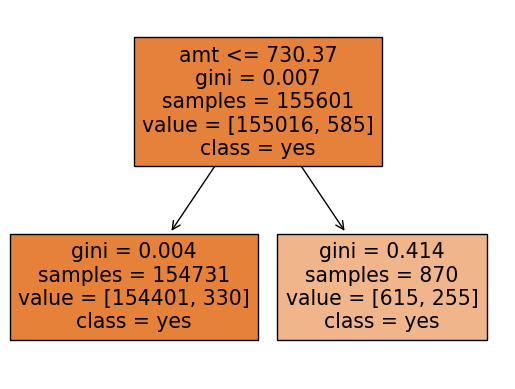

In [32]:
fig = tree.plot_tree(best_dt, feature_names=col_list, class_names=["yes", "no"], filled=True)

In [33]:
data['DT_cv_pred'] = grid_dt.predict_proba(data[col_list])[:,1]

### What is Permutation Importance?

Permutation importance is a technique for feature importance estimation in machine learning models. It measures the importance of each feature by permuting its values and observing the effect on the model's performance.

The basic idea behind permutation importance is to shuffle the values of a feature in the test set and evaluate the resulting decrease in the model's performance metric. By comparing the decrease in performance with the original performance, we can estimate the importance of the feature. Features that have a large impact on the performance metric when their values are permuted are considered more important, while features that have little impact are considered less important.

Permutation importance is a powerful technique for understanding which features are most important for a given machine learning problem. It is often used in combination with other feature selection techniques to improve the performance of models and reduce overfitting.

## Permutation importance using DT

In [34]:
def importance(clf, X, y, cn):
    imp = permutation_importance(
        clf, X, y, scoring="f1", n_repeats=10, random_state=1234
    )
    data = pd.DataFrame(imp.importances.T)
    data.columns = cn
    order = data.agg("mean").sort_values(ascending=False).index
    fig = sns.barplot(
        x="value", y="variable", color="slateblue", data=pd.melt(data[order])
    )
    fig.set(title="Permutation Importances", xlabel=None, ylabel=None)
    return fig

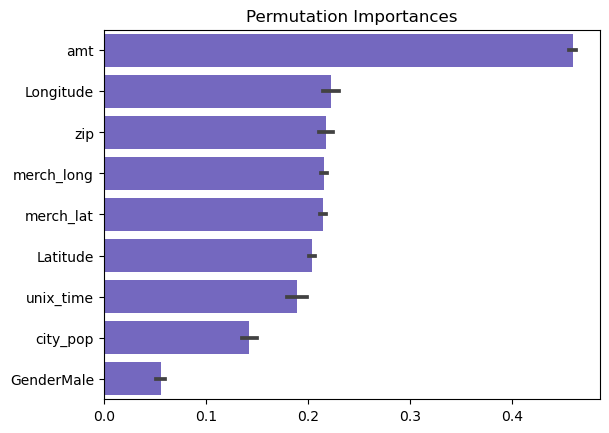

In [35]:
fig = importance(dt, data[data.Training == 0][col_list], data[data.Training == 0]['is_fraud'],
                 data[data.Training == 0][col_list].columns)

## Model Comparison

In [36]:
pred_cols = [col for col in data.columns if "pred" in col]

model_comparison = rsm.evalbin(
    pred=pred_cols,
    df=data[data.Training == 0],
    rvar="is_fraud",
    lev=1,
    cost=1,
    margin=2,
)

/home/jovyan/.rsm-msba/lib/python3.10/site-packages/pyrsm/perf.py:1038: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)
/home/jovyan/.rsm-msba/lib/python3.10/site-packages/pyrsm/perf.py:1062: RuntimeWarning: invalid value encountered in long_scalars
  ROME=[profit / (cost * (TP + FP))],


In [37]:
model_comparison

,Type,predictor,TP,FP,TN,FN,total,TPR,TNR,precision,Fscore,accuracy,kappa,profit,index,ROME,contact,AUC
0,All,dt_pred,129,148,66270,140,66687,0.48,0.998,0.466,0.473,0.996,0.47,-19,-inf,-0.069,0.004,0.739
1,All,DT_cv_pred,0,0,66418,269,66687,0.00,1.000,NaN,NaN,0.996,0.00,0,NaN,NaN,0.000,0.736


## Partial Dependence plots

#### What are Partial Dependence Plots (PDPs)

PDPs are essentially a way to graphically display the average response of a machine learning model to changes in one or more input variables, while holding all other input variables constant at their mean or median values. This allows us to see how the output of the model changes as the value of the input variable(s) being examined changes, while keeping everything else constant.

PDPs are useful because they can help us to understand the relationship between different input variables and the output of your model, and to identify any non-linear relationships or interactions that may be present in your data. This information can be helpful in developing more accurate and robust models, and in gaining insights into the underlying data generating process.

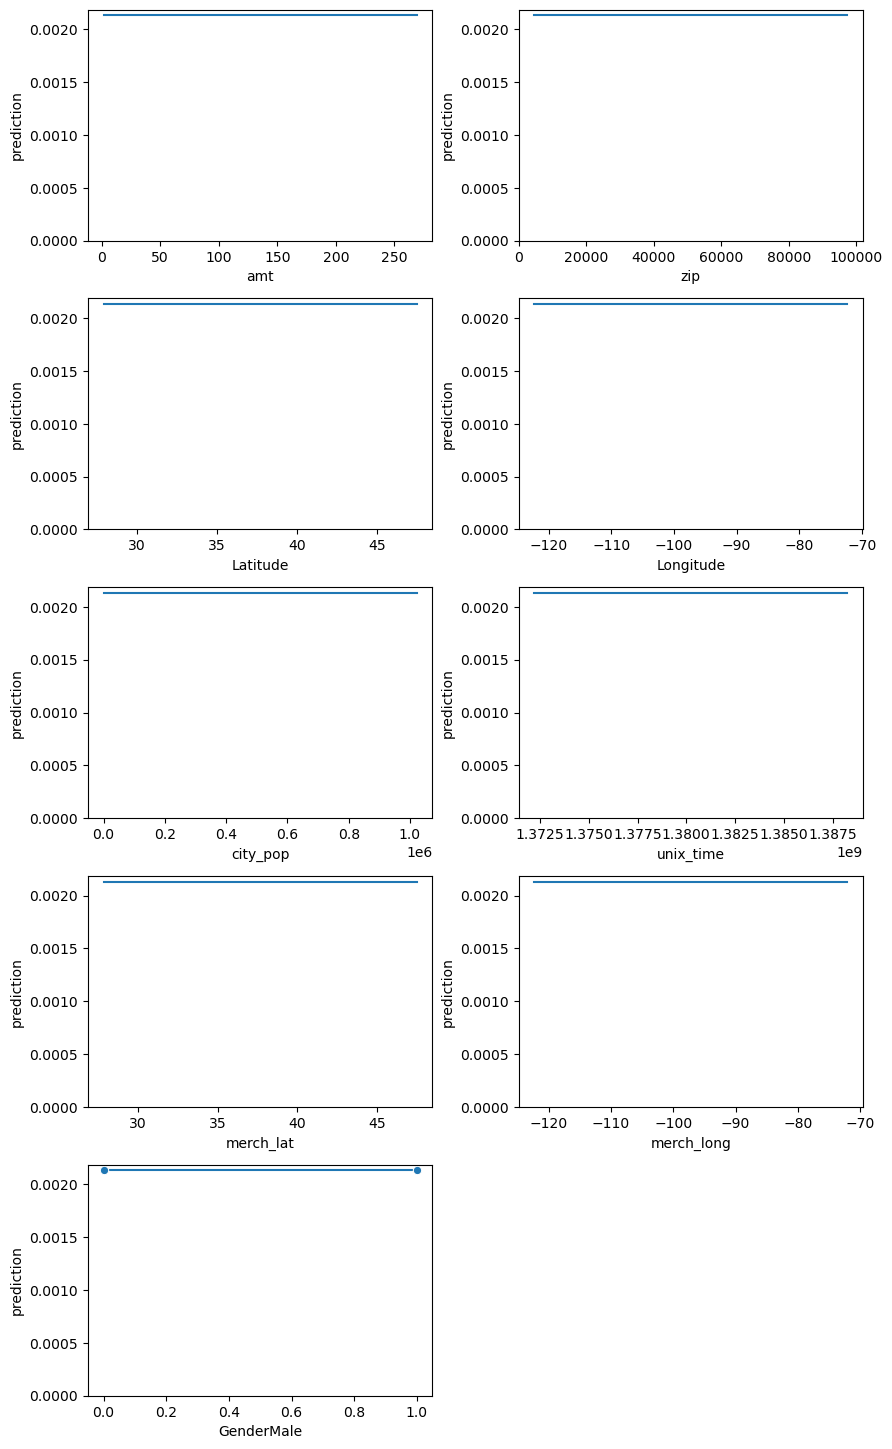

In [38]:
rsm.pred_plot_sk(grid_dt,data[col_list],rvar='is_fraud')